<a href="https://colab.research.google.com/github/KamadoSama/App-evaluation-du-personnel/blob/main/pokedex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the image (87102,)


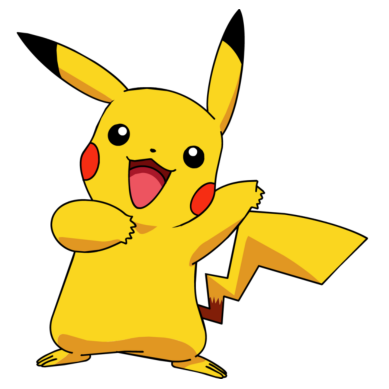

Shape of the image (568976,)


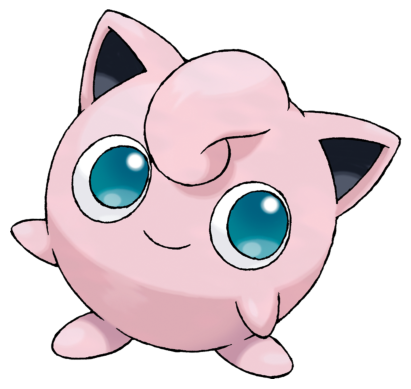

/content/datasets/dataset
/content/datasets/dataset


In [11]:

import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf


url_pikachu = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/pikachu.png?raw=true'
resp = requests.get(url_pikachu, stream=True).raw
image_array_pikachu = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_pikachu.shape}')
image_pikachu = cv2.imdecode(image_array_pikachu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

url_rondoudou = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/rondoudou.png?raw=true'
resp = requests.get(url_rondoudou, stream=True).raw
image_array_rondoudou = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_rondoudou.shape}')
image_rondoudou = cv2.imdecode(image_array_rondoudou, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
plt.show()

#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset')
print(data_dir)
print(os.path.abspath(data_dir))

In [12]:
! rm -rf /content/datasets/dataset/pokemon

In [13]:
image_count =  len(list(data_dir.glob('*/*')))
print(image_count)

174


In [14]:
batch_size = 3
image_height = 200
image_width = 200

In [15]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(image_height, image_width ),
  batch_size=batch_size,
  )
class_names = train_data.class_names
print(class_names)


Found 174 files belonging to 2 classes.
Using 140 files for training.
['pikachu', 'rondoudou']


In [16]:

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(image_height, image_width ),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)


Found 174 files belonging to 2 classes.
Using 34 files for validation.
['pikachu', 'rondoudou']


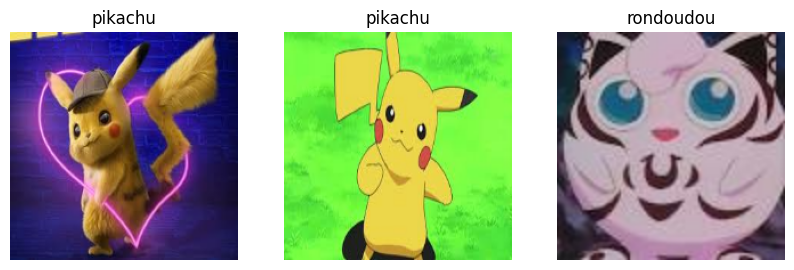

In [17]:
plt.figure(figsize=(10,10))
for images , labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit(
    train_data,
  validation_data=val_data,
  epochs=20,
  callbacks=[tensorboard_callback]
)

Epoch 1/20
47/47 [==============================] - 4s 25ms/step - loss: 0.5290 - accuracy: 0.7286 - val_loss: 0.5080 - val_accuracy: 0.9118
Epoch 2/20
47/47 [==============================] - 1s 19ms/step - loss: 0.2393 - accuracy: 0.9429 - val_loss: 0.3179 - val_accuracy: 0.9118
Epoch 3/20
47/47 [==============================] - 1s 21ms/step - loss: 0.2262 - accuracy: 0.9429 - val_loss: 0.4920 - val_accuracy: 0.9706
Epoch 4/20
47/47 [==============================] - 1s 20ms/step - loss: 0.1546 - accuracy: 0.9643 - val_loss: 0.4006 - val_accuracy: 0.9706
Epoch 5/20
47/47 [==============================] - 1s 18ms/step - loss: 0.4250 - accuracy: 0.8071 - val_loss: 0.5962 - val_accuracy: 0.5000
Epoch 6/20
47/47 [==============================] - 1s 21ms/step - loss: 0.5425 - accuracy: 0.8143 - val_loss: 0.6795 - val_accuracy: 0.4706
Epoch 7/20
47/47 [==============================] - 1s 20ms/step - loss: 0.5798 - accuracy: 0.6786 - val_loss: 0.3670 - val_accuracy: 0.7941
Epoch 8/20
47

In [19]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)       

Saving 78cdf0fbd5fff33a76174c8e3da94708.jpg to 78cdf0fbd5fff33a76174c8e3da94708.jpg


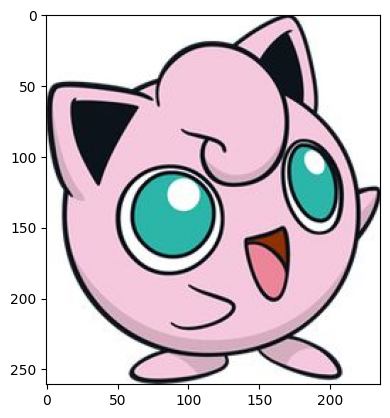

1/1 [==============================] - 0s 18ms/step
[0]
1/1 [==============================] - 0s 18ms/step
[[1.000000e+00 4.086069e-11]]


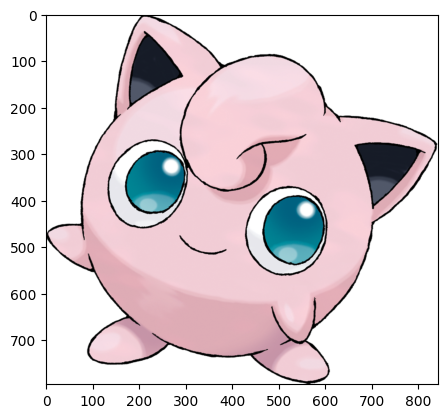

IT'S A RONDOUDOU !


In [21]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    prediction = np.argmax(model.predict(img_to_predict), axis=-1)
    print(prediction)
    print(model.predict(img_to_predict))
    if prediction == 1:
        plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A PIKACHU !")
    elif prediction == 0 :
        plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A RONDOUDOU !")
